In [2]:
import os 
import pandas as pd 
import matplotlib as plt 
import seaborn as sns 

# World Bank APIs 
import wbgapi as wb 

In [3]:
# sources 
wb.source.info() 

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-09-16
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-01-14
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2022-06-23
15,Global Economic Monitor,GEM,3,2020-07-27


In [4]:
wb.series.info() 

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [6]:
wb.series.info(db = 14)

id,value
fin1.t.a,Financial institution account (% age 15+)
fin1.t.a.1,"Financial institution account,male(% age 15+)"
fin1.t.a.2,"Financial institution account,female(% age 15+)"
fin14a.a,Used the internet to pay bills in the past year (% age 15+)
fin14a.a.1,"Used the internet to pay bills in the past year, male (% age 15+)"
fin14a.a.2,"Used the internet to pay bills in the past year , female(% age 15+)"
fin14abca.t.d,Used the internet to pay bills or to buy something online in the past year (% age 15+)
fin14abca.t.d.1,"Used the internet to pay bills or to buy something online in the past year, male (% age 15+)"
fin14abca.t.d.2,"Used the internet to pay bills or to buy something online in the past year, female (% age 15+)"
fin14b.a,Used the internet to buy something online in the past year(% age 15+)


In [7]:
wb.series.info(q='co2')

id,value
EN.ATM.CO2E.EG.ZS,CO2 intensity (kg per kg of oil equivalent energy use)
EN.ATM.CO2E.GF.KT,CO2 emissions from gaseous fuel consumption (kt)
EN.ATM.CO2E.GF.ZS,CO2 emissions from gaseous fuel consumption (% of total)
EN.ATM.CO2E.KD.GD,CO2 emissions (kg per 2015 US$ of GDP)
EN.ATM.CO2E.KT,CO2 emissions (kt)
EN.ATM.CO2E.LF.KT,CO2 emissions from liquid fuel consumption (kt)
EN.ATM.CO2E.LF.ZS,CO2 emissions from liquid fuel consumption (% of total)
EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
EN.ATM.CO2E.PP.GD,CO2 emissions (kg per PPP $ of GDP)
EN.ATM.CO2E.PP.GD.KD,CO2 emissions (kg per 2017 PPP $ of GDP)


In [8]:
wb.data.DataFrame('SP.POP.TOTL', time=range(2010, 2020, 2), labels=True)

,Country,YR2010,YR2012,YR2014,YR2016,YR2018
economy,,,,,,
ZWE,Zimbabwe,12697728.0,13115149.0,13586710.0,14030338.0,14438812.0
ZMB,Zambia,13605986.0,14465148.0,15399793.0,16363449.0,17351714.0
YEM,"Yemen, Rep.",23154854.0,24473176.0,25823488.0,27168210.0,28498683.0
PSE,West Bank and Gaza,3786161.0,3979998.0,4173398.0,4367088.0,4569087.0
VIR,Virgin Islands (U.S.),108357.0,108188.0,107882.0,107516.0,107001.0
...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,104421447.0,103935318.0,103496179.0,102994278.0,102538451.0
CSS,Caribbean small states,6973193.0,7072640.0,7173443.0,7269385.0,7358929.0
ARB,Arab World,354890097.0,371437642.0,387899835.0,404042892.0,419851989.0


AttributeError: module 'matplotlib' has no attribute 'show'

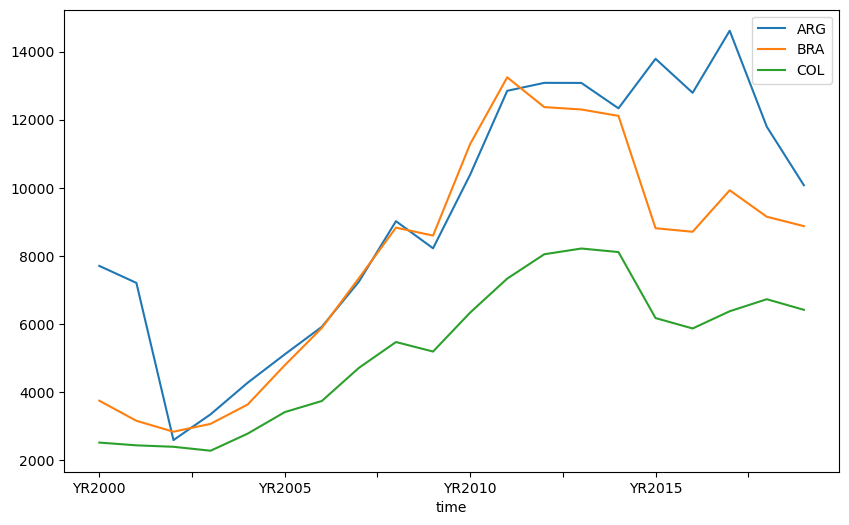

In [9]:
wb.data.DataFrame('NY.GDP.PCAP.CD', ['BRA', 'ARG', 'COL'],
                  range(2000, 2020), index='time').plot(figsize=(10, 6))
plt.show()

In [ ]:
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression 